In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Data Loading

In [ ]:
water_potability_df = pd.read_csv("data/water_potability.csv")
water_potability_df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

## Exploratory Data Analysis (EDA)

### Deskripsi Variabel

Deskripsi Variabel


Penjelasan setiap kolom
pH: Tingkat pH air.
Hardness: Kesadahan air, ukuran kandungan mineral.
Solids: Total padatan terlarut di dalam air.
Chloramines: Konsentrasi kloramin di dalam air.
Sulfate: Konsentrasi sulfat di dalam air.
Conductivity: Daya hantar listrik air.
Organic_carbon: Kandungan karbon organik dalam air.
Trihalomethanes: Konsentrasi trihalometana di dalam air.
Turbidity: Tingkat kekeruhan, ukuran kejernihan air.
Potability: Variabel target; menunjukkan potensi air dengan nilai 1 (dapat diminum) dan 0 (tidak dapat diminum).

In [ ]:
# Info Dataset
water_potability_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
# Deskripsi Dataset
water_potability_df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

### Menangani Missing Value

In [ ]:
# Cek Missing Value 
water_potability_df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
# Cek nilai NaN pada kolom "ph"
x = water_potability_df["ph"].isna().sum()

# Cek nilai NaN pada kolom "Sulfate"
y = water_potability_df["Sulfate"].isna().sum()

# Cek nilai NaN pada kolom "Trihalomethanes"
z = water_potability_df["Trihalomethanes"].isna().sum()
 
print("Nilai NaN di kolom Ph ada: ", x)
print("Nilai NaN di kolom Sulfate ada: ", y)
print("Nilai NaN di kolom Trihalomethanes ada: ", z)

Nilai NaN di kolom Ph ada:  491
Nilai NaN di kolom Sulfate ada:  781
Nilai NaN di kolom Trihalomethanes ada:  162


In [ ]:
water_potability_df.loc[(water_potability_df['Sulfate'].isna())]

ph    Hardness        Solids  Chloramines  Sulfate  Conductivity  \
1     3.716080  129.422921  18630.057858     6.635246      NaN    592.885359   
2     8.099124  224.236259  19909.541732     9.275884      NaN    418.606213   
11    7.974522  218.693300  18767.656682     8.110385      NaN    364.098230   
14    7.496232  205.344982  28388.004887     5.072558      NaN    444.645352   
16    7.051786  211.049406  30980.600787    10.094796      NaN    315.141267   
...        ...         ...           ...          ...      ...           ...   
3266  8.372910  169.087052  14622.745494     7.547984      NaN    464.525552   
3272  7.808856  193.553212  17329.802160     8.061362      NaN    392.449580   
3273  9.419510  175.762646  33155.578218     7.350233      NaN    432.044783   
3274  5.126763  230.603758  11983.869376     6.303357      NaN    402.883113   
3275  7.874671  195.102299  17404.177061     7.509306      NaN    327.459760   

      Organic_carbon  Trihalomethanes  Turbidity  Potability  
1          15.180013        56.329076   4.500656           0  
2          16.868637        66.420093   3.055934           0  
11         14.525746        76.485911   4.011718           0  
14         13.228311        70.300213   4.777382           0  
16         20.397022        56.651604   4.268429           0  
...              ...              ...        ...         ...  
3266       11.083027        38.435151   4.906358           1  
3272       19.903225              NaN   2.798243           1  
3273       11.039070        69.845400   3.298875           1  
3274       11.168946        77.488213   4.708658           1  
3275       16.140368        78.698446   2.309149           1  

[781 rows x 10 columns]

In [ ]:
# Cek apakah data bernilai NaN pada salah satu dimensi juga terdapat pada dimensi lain
is_in_all = water_potability_df["ph"].isna().isin(water_potability_df["Sulfate"].isna())

print(is_in_all)

0       True
1       True
2       True
3       True
4       True
        ... 
3271    True
3272    True
3273    True
3274    True
3275    True
Name: ph, Length: 3276, dtype: bool


In [ ]:
# Mengganti nilai NaN pada kolom Sulfate dengan nilai rata-rata (Mean)
mean = water_potability_df["Sulfate"].mean()
water_potability_df["Sulfate"] = water_potability_df["Sulfate"].replace(np.nan, mean)
print(water_potability_df["Sulfate"].isna().sum())

0


In [ ]:
# Mengganti nilai NaN pada kolom ph dengan nilai rata-rata (Mean)
mean = water_potability_df["ph"].mean()
water_potability_df["ph"] = water_potability_df["ph"].replace(np.nan, mean)
print(water_potability_df["ph"].isna().sum())

0


In [ ]:
# Mengganti nilai NaN pada kolom ph dengan nilai rata-rata
mean = water_potability_df["Trihalomethanes"].mean()
water_potability_df["Trihalomethanes"] = water_potability_df["Trihalomethanes"].replace(np.nan, mean)
print(water_potability_df["Trihalomethanes"].isna().sum())

0


In [ ]:
water_potability_df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.469956    32.879761   8768.570828     1.583085    36.142612   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.080795   196.967627  20927.833607     7.130299   333.775777   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        15.769881     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        56.647656     3.439711     0.000000  
50%      421.884968       14.218338        66.396293     3.955028     0.000000  
75%      481.792304       16.557652        76.666609     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [ ]:
# Cek Missing Value setelah di replace
water_potability_df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
water_potability_df.shape

(3276, 10)

### Menangani Outlier

<AxesSubplot: xlabel='ph'>

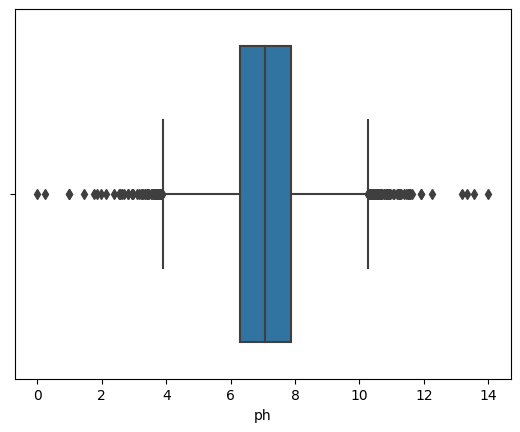

In [ ]:
# Outlier Fitur ph
sns.boxplot(x=water_potability_df['ph'])

<AxesSubplot: xlabel='Hardness'>

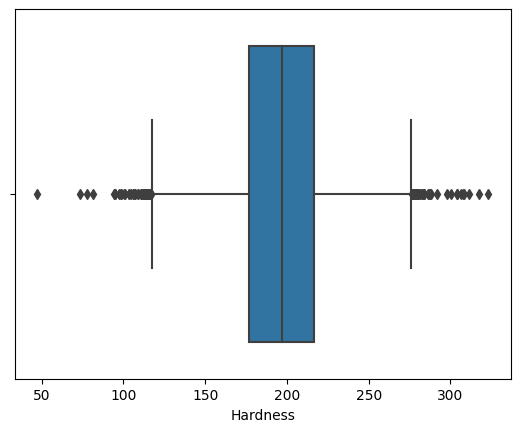

In [ ]:
# Outlier Fitur Hardness
sns.boxplot(x=water_potability_df['Hardness'])

<AxesSubplot: xlabel='Solids'>

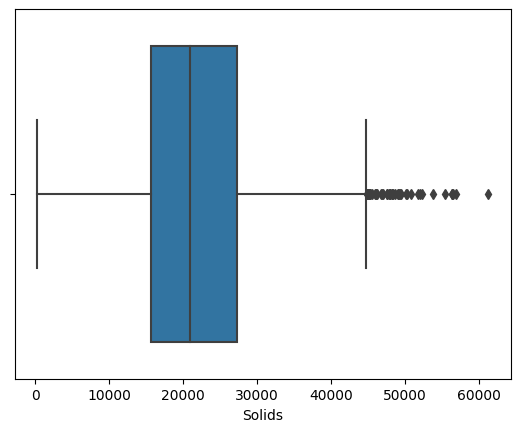

In [ ]:
# Outlier Fitur Solids
sns.boxplot(x=water_potability_df['Solids'])

<AxesSubplot: xlabel='Chloramines'>

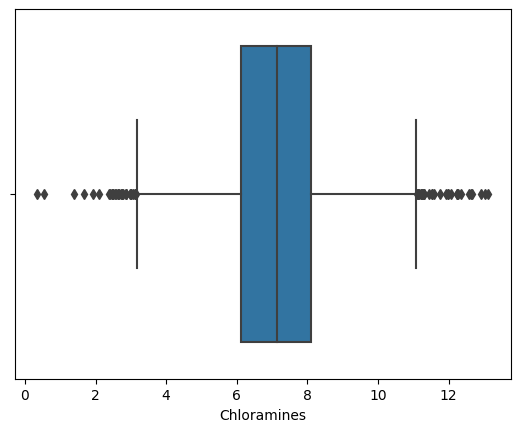

In [ ]:
# Outlier Fitur Chloramines
sns.boxplot(x=water_potability_df['Chloramines'])

<AxesSubplot: xlabel='Sulfate'>

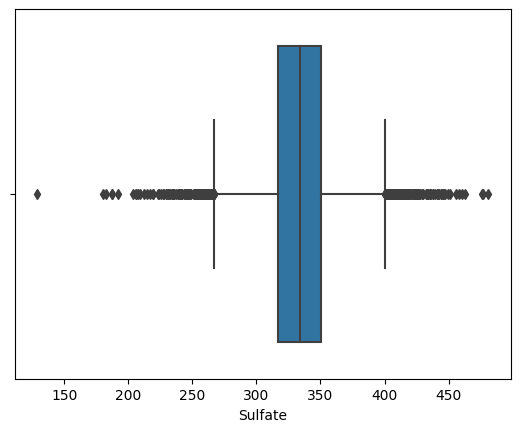

In [ ]:
# Outlier Fitur Sulfate
sns.boxplot(x=water_potability_df['Sulfate'])

<AxesSubplot: xlabel='Conductivity'>

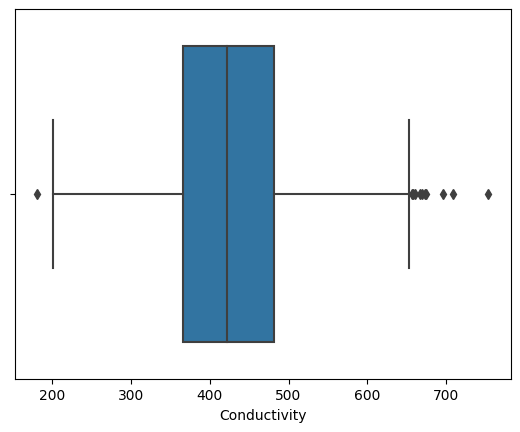

In [ ]:
# Outlier Fitur Conductivity
sns.boxplot(x=water_potability_df['Conductivity'])

<AxesSubplot: xlabel='Organic_carbon'>

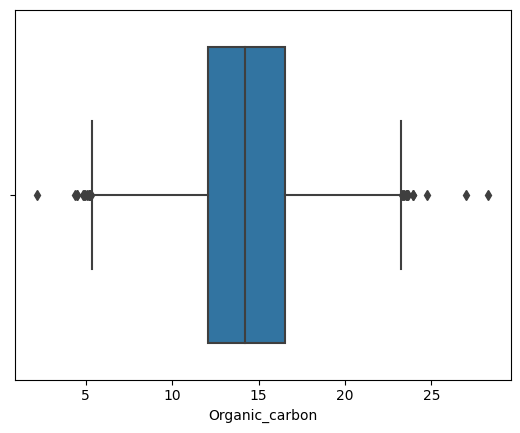

In [ ]:
# Outlier Fitur Organic_carbon
sns.boxplot(x=water_potability_df['Organic_carbon'])

<AxesSubplot: xlabel='Trihalomethanes'>

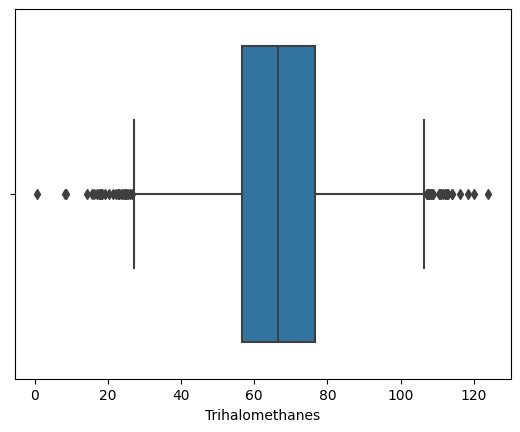

In [ ]:
# Outlier Fitur Trihalomethanes
sns.boxplot(x=water_potability_df['Trihalomethanes'])

<AxesSubplot: xlabel='Turbidity'>

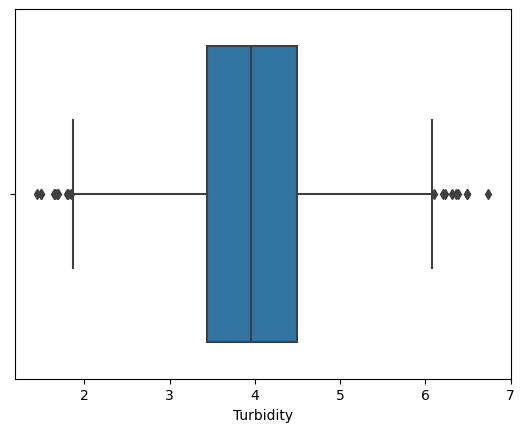

In [ ]:
# Outlier Fitur Turbidity
sns.boxplot(x=water_potability_df['Turbidity'])

In [ ]:
# Solusi menyelesaikan Outliner

Q1 = water_potability_df.quantile(0.25)
Q3 = water_potability_df.quantile(0.75)
IQR=Q3-Q1
water_potability_df=water_potability_df[~((water_potability_df<(Q1-1.5*IQR))|(water_potability_df>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah drop outliers
water_potability_df.shape

(2666, 10)

### Univariate Analysis

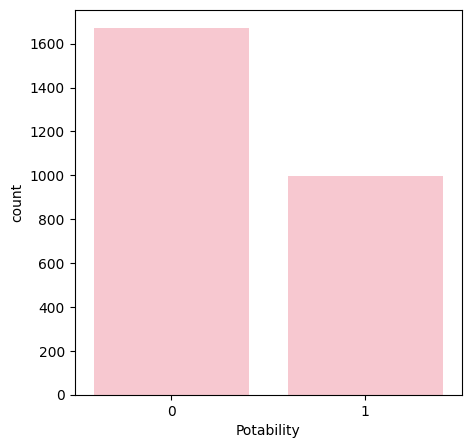

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(data=water_potability_df, x=water_potability_df["Potability"], color="pink")
plt.show()

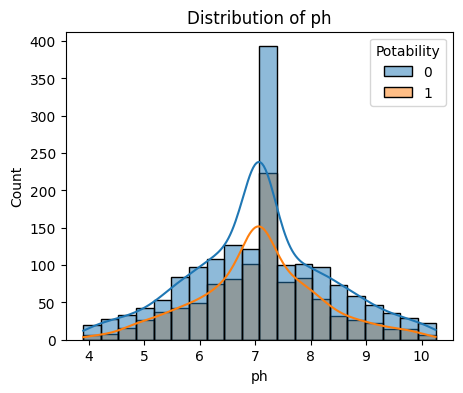

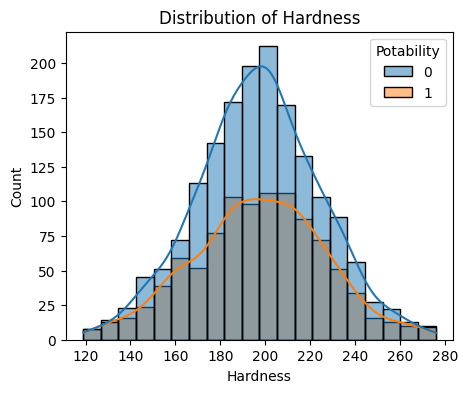

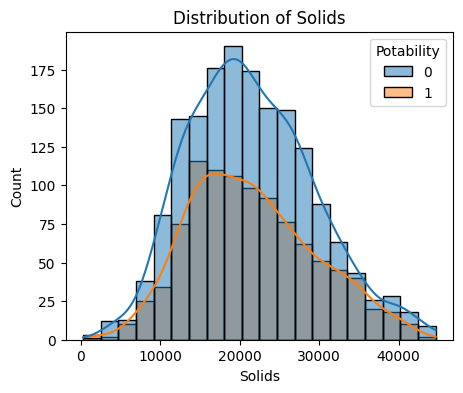

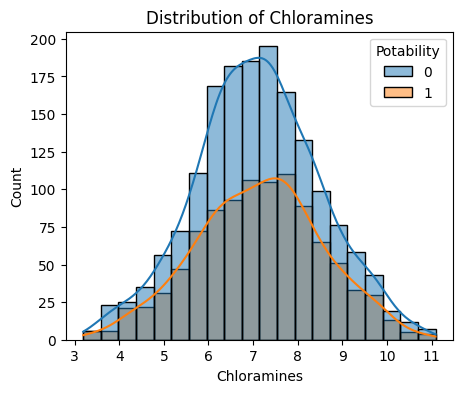

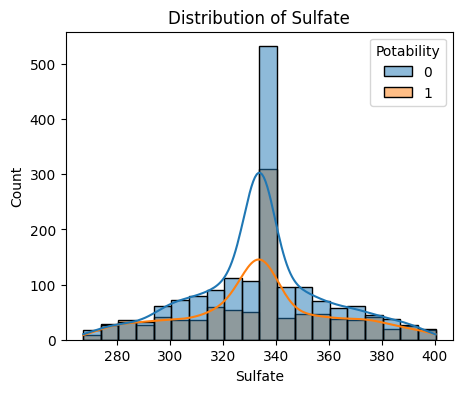

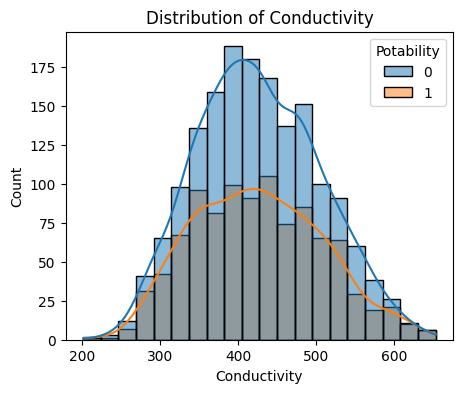

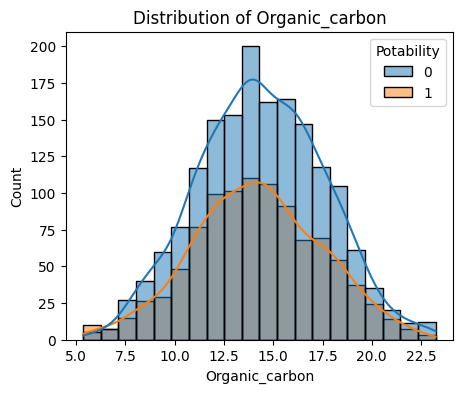

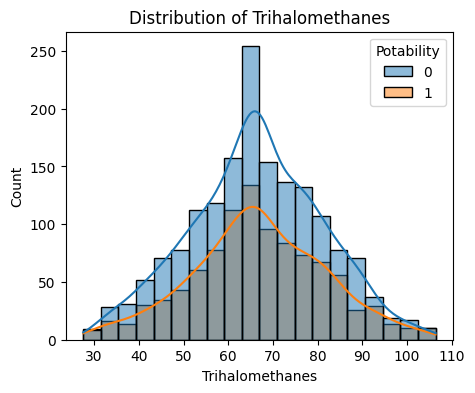

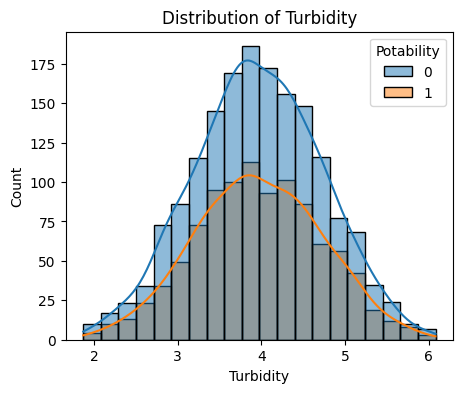

In [ ]:
columns = water_potability_df.columns.drop('Potability')
for col in columns:
    plt.figure(figsize=(5, 4))
    sns.histplot(data=water_potability_df, x=col, kde=True,hue='Potability', bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

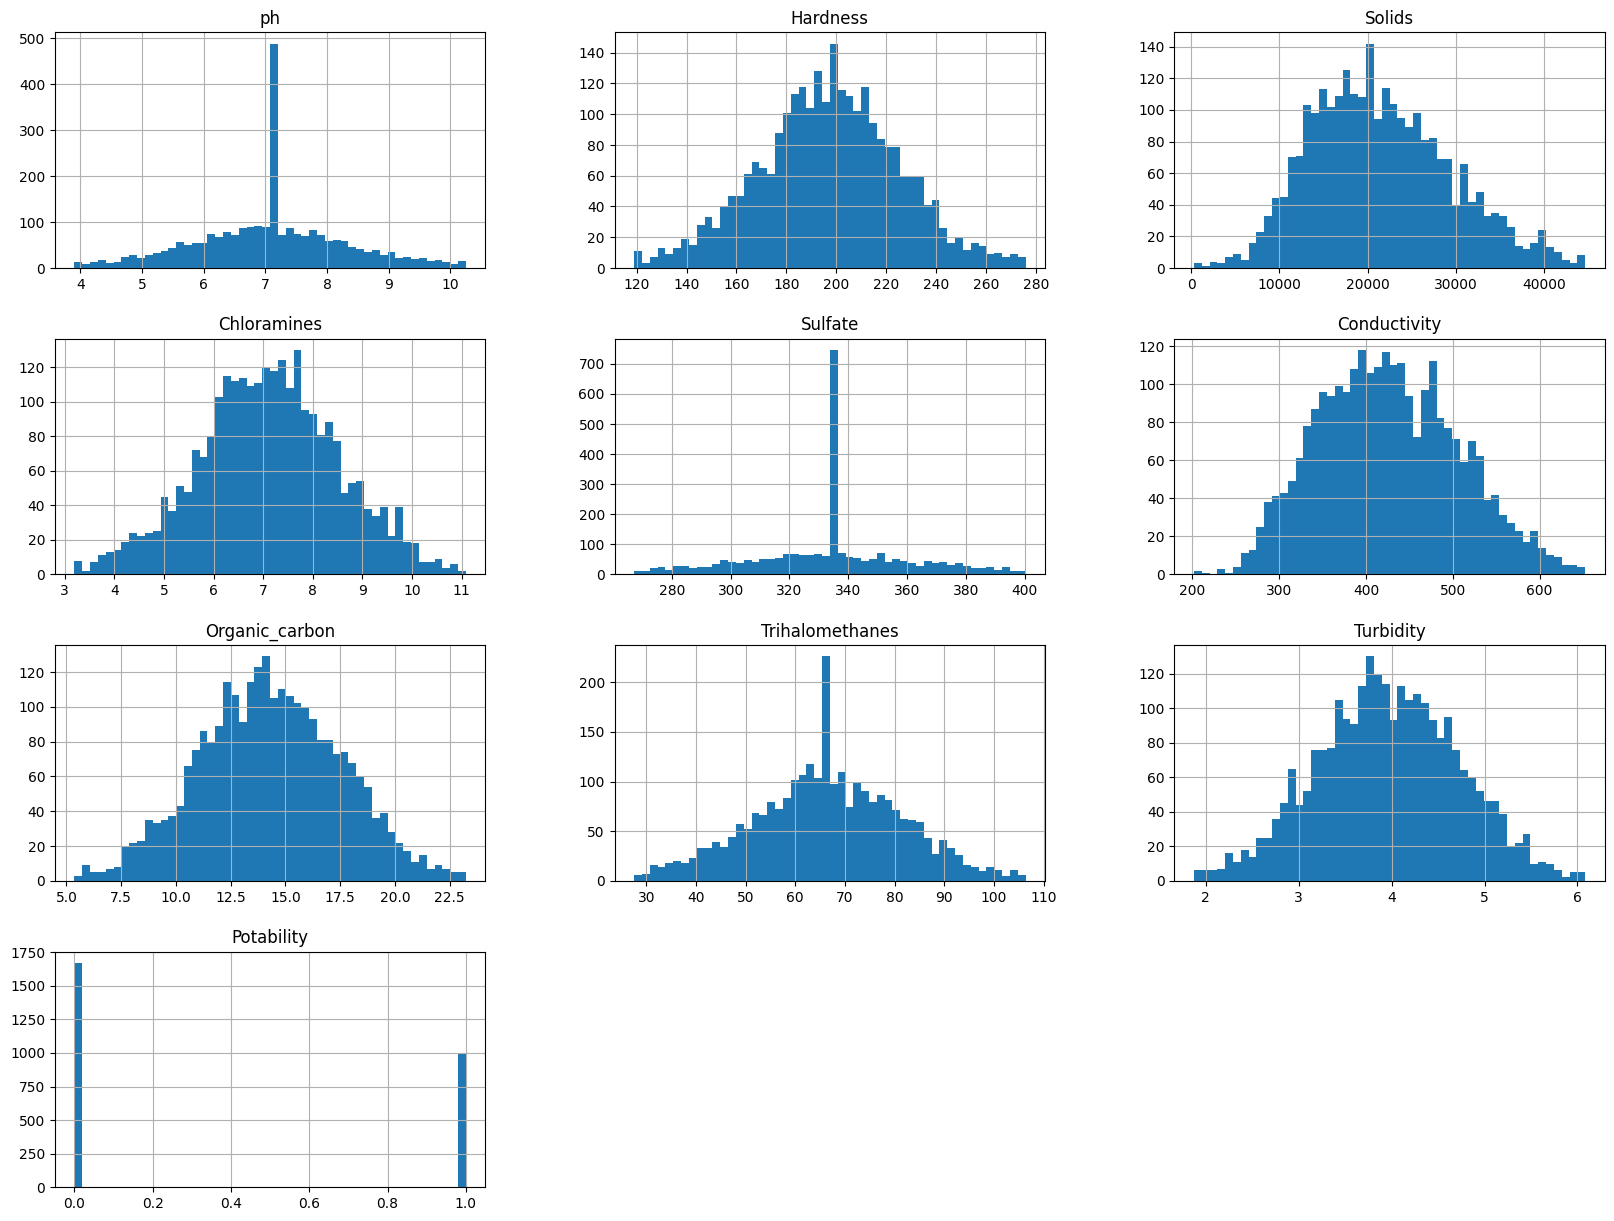

In [ ]:
water_potability_df.hist(bins=50, figsize=(20, 15))
plt.show()

### Multivariate Analysis

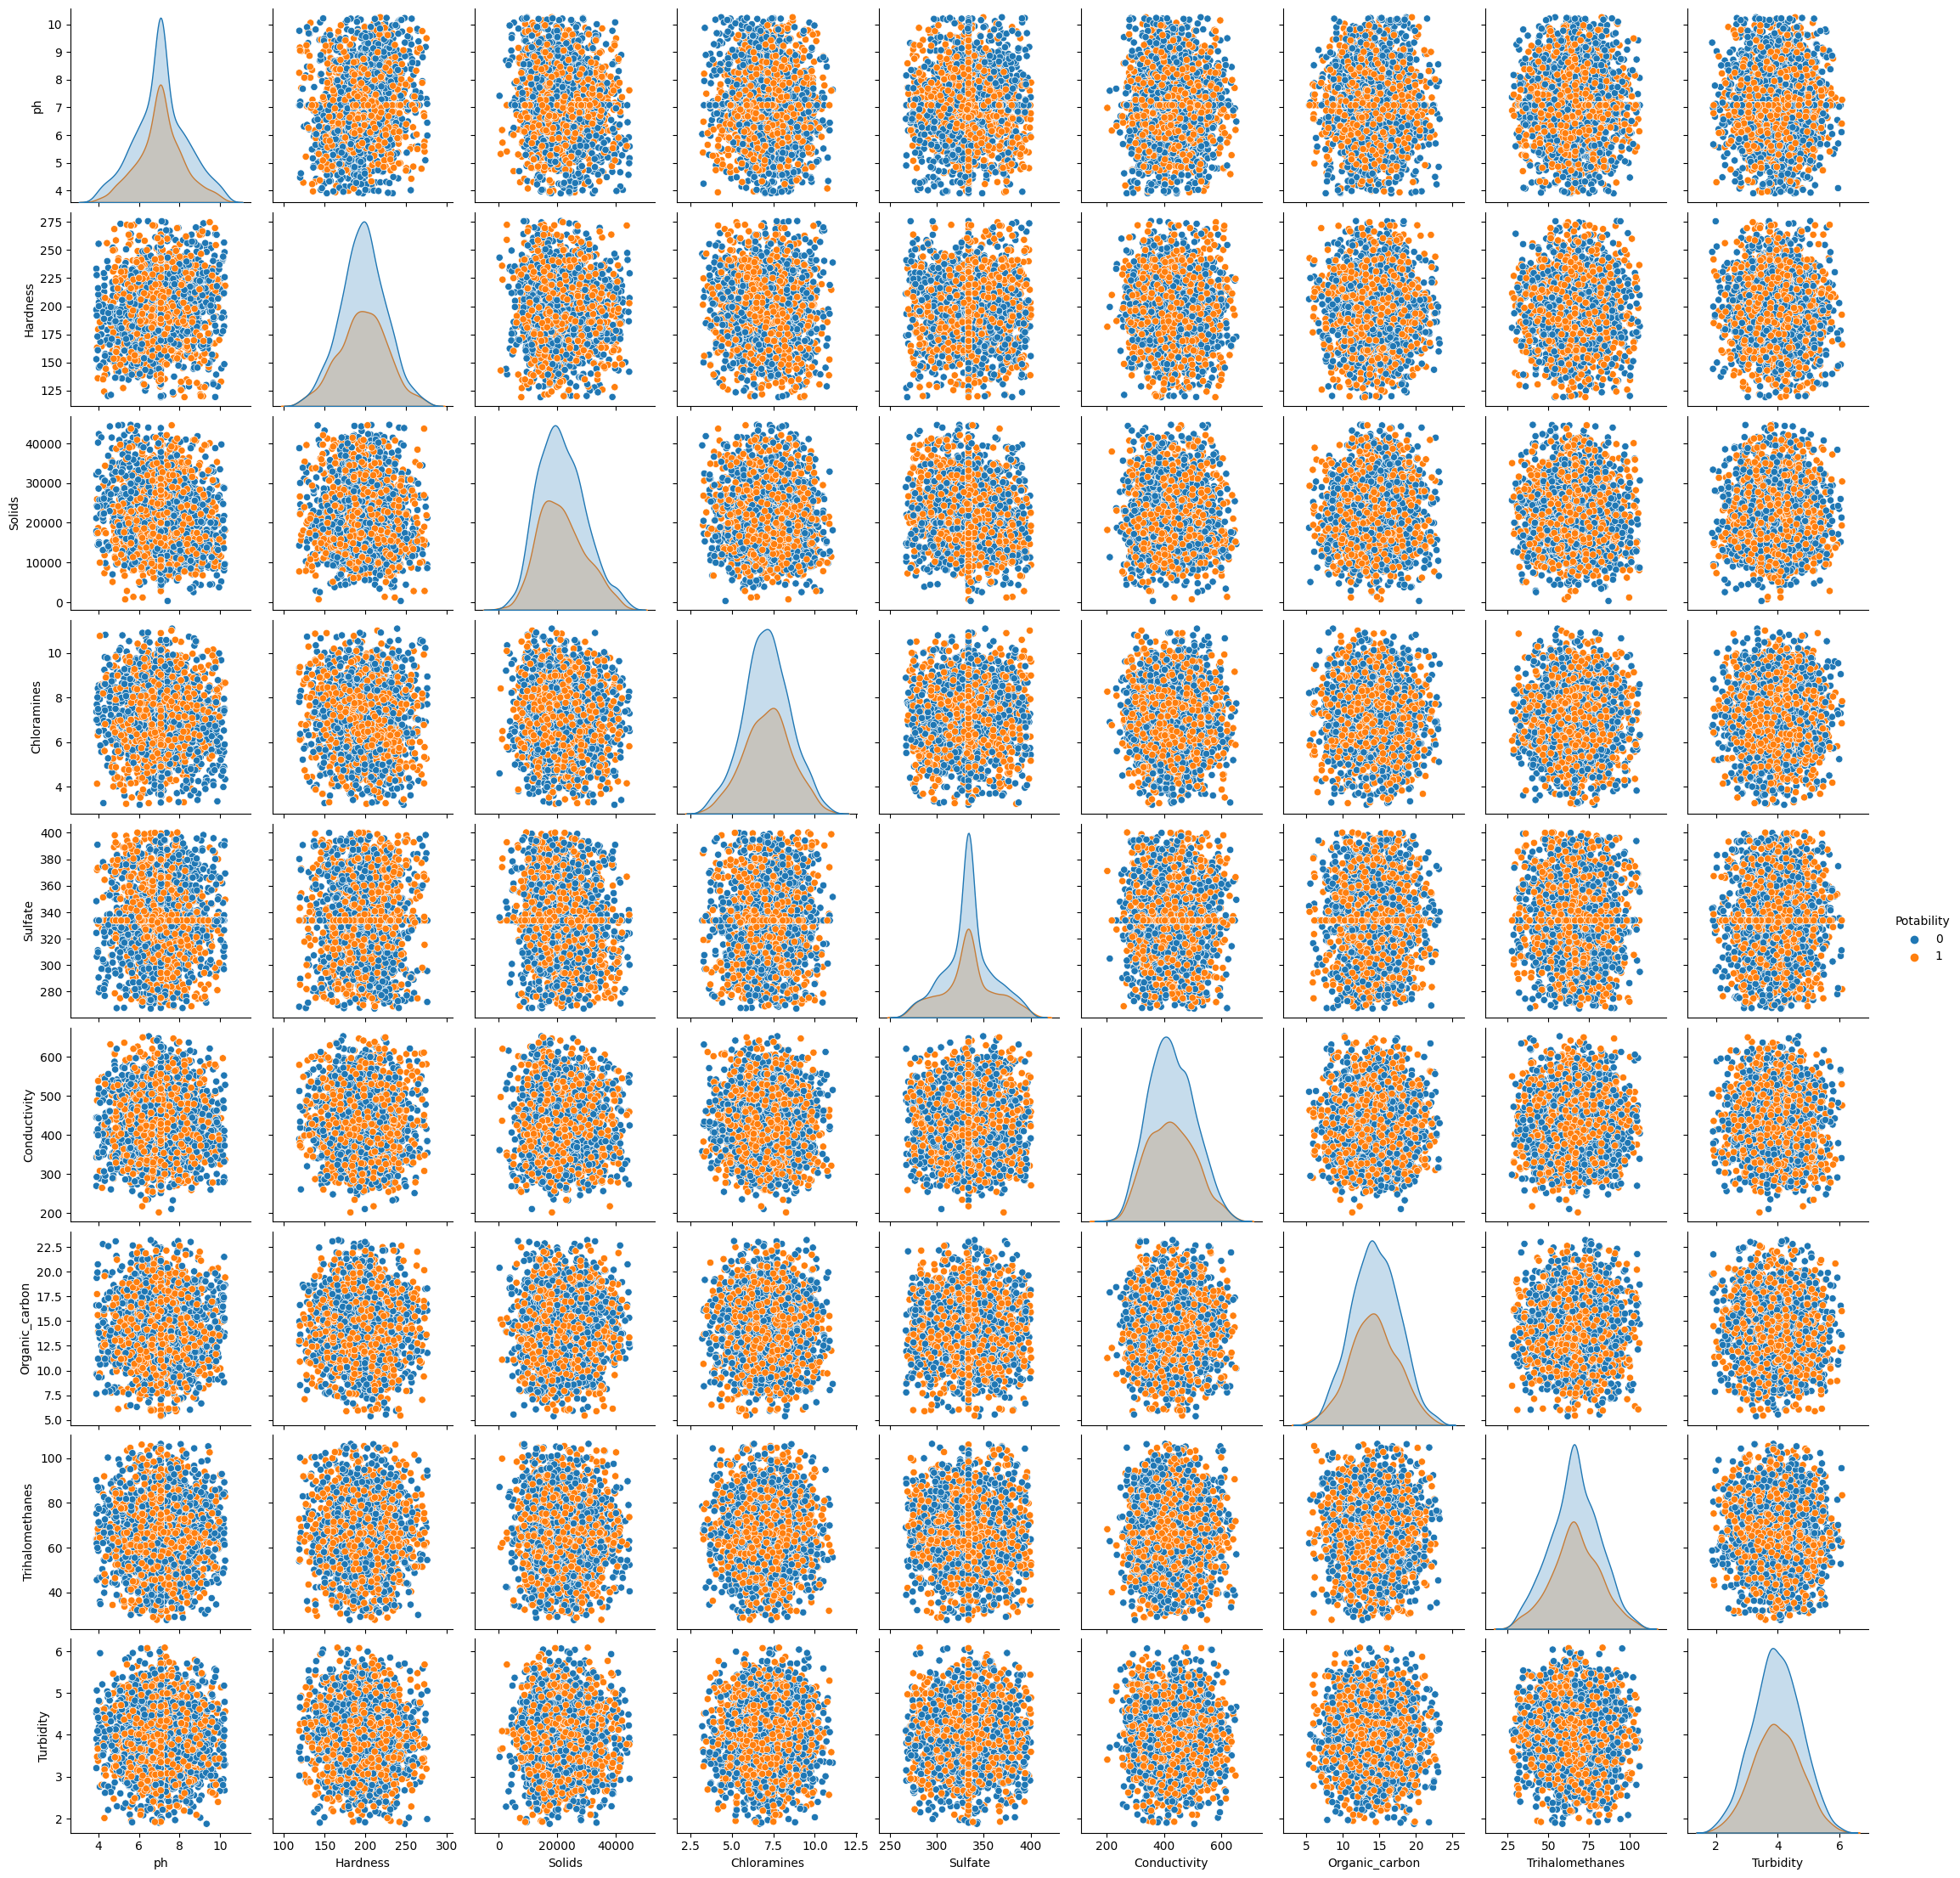

In [ ]:
sns.pairplot(water_potability_df,hue='Potability' ,diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

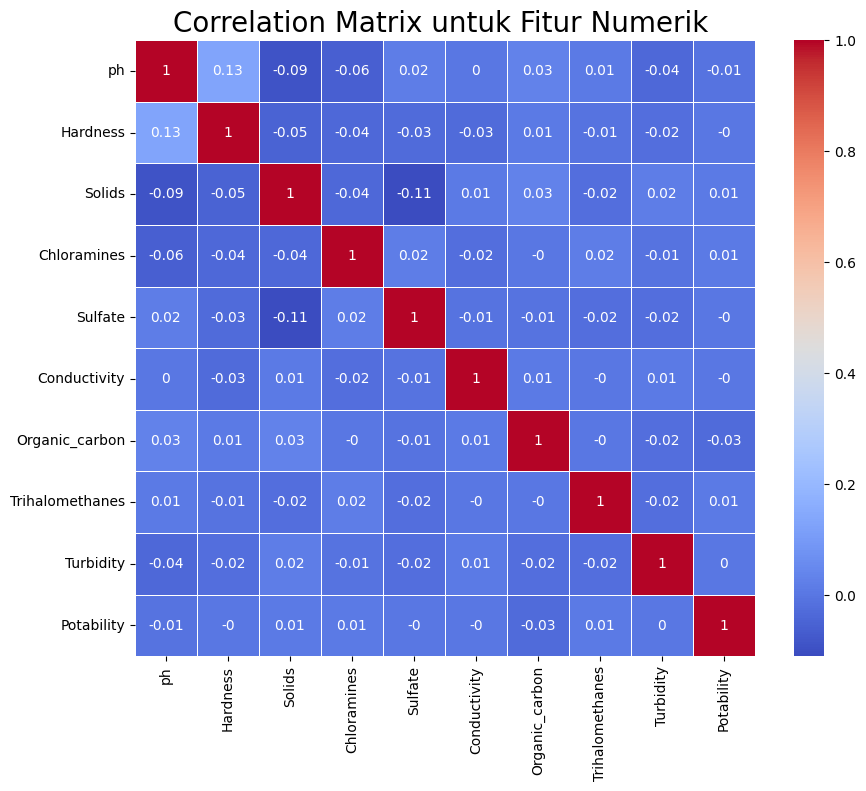

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = water_potability_df.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

## Data preparation

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = water_potability_df.drop(["Potability"],axis =1)
y = water_potability_df["Potability"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 2666
Total # of sample in train dataset: 2399
Total # of sample in test dataset: 267


## Model Development

In [ ]:
from sklearn.metrics import accuracy_score

models = pd.DataFrame(index=['train_accuracy', 'test_accuracy'],
                      columns=['LogisticRegression', 'KNN', 'RandomForest', 'NaiveBayes' ,'Boosting'])

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logres = LogisticRegression(solver='liblinear', class_weight='balanced')
logres.fit(X_train, y_train)

models.loc['train_accuracy', 'LogisticRegression'] = accuracy_score(y_true=y_train, y_pred=logres.predict(X_train))
models.loc['test_accuracy', 'LogisticRegression'] = accuracy_score(y_true=y_test, y_pred=logres.predict(X_test))

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
 
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_accuracy', 'KNN'] = accuracy_score(y_true=y_train, y_pred=knn.predict(X_train))
models.loc['test_accuracy', 'KNN'] = accuracy_score(y_true=y_test, y_pred=knn.predict(X_test))

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
 
RF = RandomForestClassifier(n_estimators=60, max_depth=20, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_accuracy', 'RandomForest'] = accuracy_score(y_true=y_train, y_pred=RF.predict(X_train))
models.loc['test_accuracy', 'RandomForest'] = accuracy_score(y_true=y_test, y_pred=RF.predict(X_test))

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train, y_train)

models.loc['train_accuracy', 'NaiveBayes'] = accuracy_score(y_true=y_train, y_pred=NB.predict(X_train))
models.loc['test_accuracy', 'NaiveBayes'] = accuracy_score(y_true=y_test, y_pred=NB.predict(X_test))

### Boosting Algoritm

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
 
boosting = AdaBoostClassifier(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_accuracy', 'Boosting'] = accuracy_score(y_true=y_train, y_pred=boosting.predict(X_train))
models.loc['test_accuracy', 'Boosting'] = accuracy_score(y_true=y_test, y_pred=boosting.predict(X_test))

## Evaluasi Model

In [ ]:
# Buat variabel akurasi yang isinya adalah dataframe nilai akurasi data train dan test pada masing-masing algoritma
akurasi = pd.DataFrame(columns=['train', 'test'], index=['Logre','KNN','RF','NaiveBayes','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'Logre': logres,'KNN': knn, 'RF': RF, 'NaiveBayes': NB ,'Boosting': boosting}
 
# Hitung akurasi masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    akurasi.loc[name, 'train'] = accuracy_score(y_true=y_train, y_pred=model.predict(X_train))
    akurasi.loc[name, 'test'] = accuracy_score(y_true=y_test, y_pred=model.predict(X_test))
 
# Panggil akurasi
akurasi

train      test
Logre        0.51313  0.501873
KNN         0.659441   0.64794
RF               1.0  0.681648
NaiveBayes  0.619008  0.636704
Boosting    0.624427   0.64794

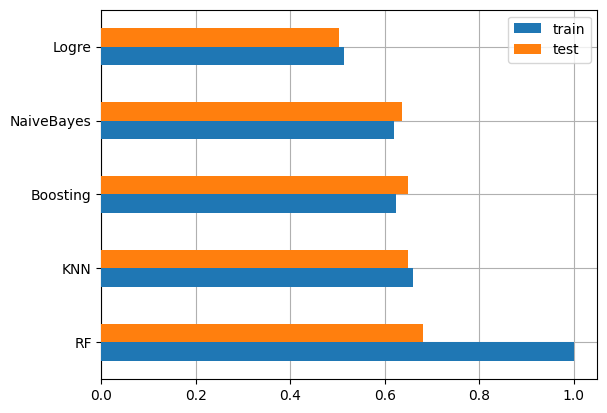

In [ ]:
fig, ax = plt.subplots()
akurasi.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

## Archieved

Melakukan beberapa tahap preparation tambahan PCA dan Standarisasi
(Masih dalam tahap uji coba)

In [ ]:
numerical_features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

### PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=9, random_state=123)
pca.fit(water_potability_df[numerical_features])
princ_comp = pca.transform(water_potability_df[numerical_features])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=9, random_state=123)
pca.fit(water_potability_df[numerical_features])
princ_comp = pca.transform(water_potability_df[numerical_features])

In [ ]:
pca.explained_variance_ratio_.round(4)

array([9.999e-01, 1.000e-04, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00])

In [ ]:
water_potability_df['dimension'] = pca.transform(water_potability_df.loc[:, ('ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity')]).flatten()

ValueError: Length of values (23994) does not match length of index (2666)

### Menerapkan Standarisasi

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
3057  0.753502  0.097256 -0.499477    -0.241444 -1.404763     -0.600951   
764   0.010549 -1.354904  0.591167    -2.130085 -0.000953     -0.884250   
733   1.783435  0.533706 -0.847573     0.040970 -0.364937      1.864061   
1671 -0.774566 -1.603120 -0.814401    -0.354736  1.830619     -0.469459   
1794  1.977159 -1.677998  1.394960    -1.253614 -0.000953      0.129427   

      Organic_carbon  Trihalomethanes  Turbidity  
3057       -1.239755         0.028979   1.026894  
764         0.539197         1.266808   1.363838  
733         0.717922         0.028612  -0.647269  
1671        0.730629         0.181774   0.320238  
1794       -0.107602         0.360679   0.960327

In [ ]:
X_train[numerical_features].describe().round(4)

ph   Hardness     Solids  Chloramines    Sulfate  Conductivity  \
count  2399.0000  2399.0000  2399.0000    2399.0000  2399.0000     2399.0000   
mean     -0.0000     0.0000    -0.0000       0.0000    -0.0000        0.0000   
std       1.0002     1.0002     1.0002       1.0002     1.0002        1.0002   
min      -2.5998    -2.7510    -2.6818      -2.7593    -2.4993       -2.7934   
25%      -0.6029    -0.6268    -0.7446      -0.6549    -0.5287       -0.7563   
50%       0.0105     0.0106    -0.0939      -0.0064    -0.0010       -0.0557   
75%       0.5926     0.6605     0.6608       0.6657     0.5404        0.6893   
max       2.6157     2.7562     2.9227       2.7959     2.5081        2.8249   

       Organic_carbon  Trihalomethanes  Turbidity  
count       2399.0000        2399.0000  2399.0000  
mean          -0.0000           0.0000     0.0000  
std            1.0002           1.0002     1.0002  
min           -2.7727          -2.6102    -2.7384  
25%           -0.6962          -0.6378    -0.6901  
50%           -0.0264          -0.0042    -0.0233  
75%            0.7074           0.6818     0.7106  
max            2.7880           2.6782     2.7675

### Evaluasi Model

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
models.loc['train_accuracy', 'KNN'] = accuracy_score(y_true=y_train, y_pred=knn.predict(X_train))
models.loc['test_accuracy', 'KNN'] = accuracy_score(y_true=y_test, y_pred=knn.predict(X_test))

# Random Forest
RF = RandomForestClassifier(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
models.loc['train_accuracy', 'RandomForest'] = accuracy_score(y_true=y_train, y_pred=RF.predict(X_train))
models.loc['test_accuracy', 'RandomForest'] = accuracy_score(y_true=y_test, y_pred=RF.predict(X_test))

# Boosting Algorithm
boosting = AdaBoostClassifier(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_accuracy', 'Boosting'] = accuracy_score(y_true=y_train, y_pred=boosting.predict(X_train))
models.loc['test_accuracy', 'Boosting'] = accuracy_score(y_true=y_test, y_pred=boosting.predict(X_test))

In [ ]:
# Evaluasi Model
# Buat variabel akurasi yang isinya adalah dataframe nilai akurasi data train dan test pada masing-masing algoritma
akurasi = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
# Hitung akurasi masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    akurasi.loc[name, 'train'] = accuracy_score(y_true=y_train, y_pred=model.predict(X_train))
    akurasi.loc[name, 'test'] = accuracy_score(y_true=y_test, y_pred=model.predict(X_test))
 
# Panggil akurasi
akurasi

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=65e930db-9d38-43ff-a65f-1afd02f3ba6e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>